In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

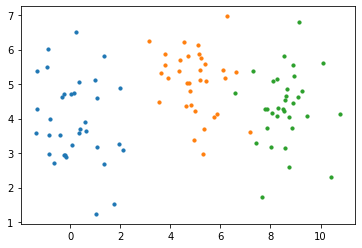

In [2]:
centers = [(0, 4), (5, 5) , (8,4.4)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")

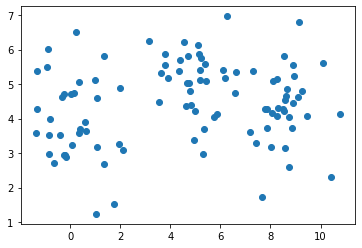

In [3]:
plt.scatter(X[:,0],X[:,1])

In [52]:
def check_core_point(x,y,eps,minPts, df, index):
    
    data.at[index,'visited'] = True
    
    #check available points within radius
    temp =  df[(np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)]
    
    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp , True, False, False)
    
    elif (len(temp) < minPts) and len(temp) > 1:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp , False, True, False)
    
    elif len(temp) == 1:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp , False, False, True)
        

In [53]:
def get_cluster(eps, minPts, df, first_point = True, C = 0):
       
    #base case is if all the points have been visited
    if len(df[df["visited"] == False]) == 0:
        return 
    #if this is a new cluster then randomly sample a new point
    pts = df[df["visited"] == False].sample(1)

    tempdf, iscore, isborder, isnoise = check_core_point(pts['X'].iloc[0], pts['Y'].iloc[0], eps, minPts, df, pts.index)

    if iscore:
        print("core found at")
        #Assign cluster to point and all neighbours
        df.at[tempdf.index, 'cluster'] = C
        get_cluster(eps,minPts,tempdf)
        #tempdf, iscore, isborder, isnoise = check_core_point(neighbour['X'], neighbour['Y'], eps, minPts, data, neighbour.index)

    elif isborder:
        print("Border found at")
        df.at[tempdf.index, 'cluster'] = C
        C+=1
        get_cluster(eps,minPts, df, C)

    elif isnoise:
        print("Noise found at")
        df.at[tempdf.index, 'cluster'] = 'N'
        get_cluster(eps,minPts, df, C)
    return 
        
    

In [54]:
data = pd.DataFrame(X, columns = ["X", "Y"] )
data["visited"] = False
data["cluster"] = None

In [69]:
eps = 1
minPts = 3

In [70]:

get_cluster(eps,minPts, data)


NameError: name 'get_cluster' is not defined

# Implementation with stack

In [33]:
def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']
    
    #check available points within radius
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]
    
    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , True, False, False)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, True, False)
    
    elif len(temp) == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, False, True)

In [73]:
def cluster_with_stack(eps, minPts, df):
    #flag to check if loop is running for the first time
    first_run = True
    
    #initiating cluster number
    C = 0
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) != 0):
        print("Unvisited points:", len(unvisited))
        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        #print("New first point picked")
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) != 0:
            
            #print("stack at start of loop", current_stack)
            #pop current point from stack
            curr_idx = current_stack.pop()
            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)
            
            #if current point is a border point a the first point of a cluster
            if (isborder & first_point):
                #print("First border point picked...running loop again")
                #empty the current stack
                #current_stack.clear()
                #break the loop and try again with a new point
                isnoise, isborder = (True, False)
                
            
            #remove point from unvisited list
            unvisited.remove(curr_idx)
            
            
            neigh_indexes = set(neigh_indexes) & set(unvisited)
            #print("Neighbours", neigh_indexes)
            if iscore:
                first_point = False
                print("Was core")
                clusters.append((curr_idx,C))
                print("Clusters", clusters)
                current_stack.update(neigh_indexes)

            elif isborder:
                print("was border")
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise:
    
                print("was noise")
                clusters.append((curr_idx,'N'))
                
                continue
                
        #Cancel parameter
        first_run = False
        
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters
            

In [77]:
eps = 0.5
minPts = 3

In [78]:
data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)

Unvisited points: 100
was noise
Unvisited points: 99
Was core
Clusters [(4, 'N'), (98, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0)]
was border
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0), (82, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0), (82, 0), (20, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0), (82, 0), (20, 0), (23, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0), (82, 0), (20, 0), (23, 0), (89, 0)]
Was core
Clusters [(4, 'N'), (98, 0), (50, 0), (5, 0), (9, 0), (75, 0), (13, 0), (18, 0), (82, 

In [82]:
idx , cluster = list(zip(*clustered))